# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf)
print(np.nan)
print(np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf
nan
3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type", M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/moon.png')

Array can be displayed as an image using Matplotlib module. Here a short example:

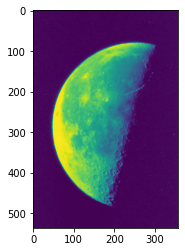

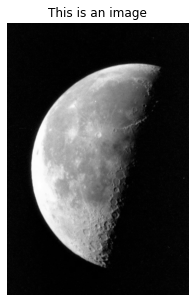

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [15]:
from PIL import Image
import numpy as np

def openImage(fname):
    img = np.array(Image.open(fname))
    return img

image = openImage("img/moon.png")
print(image)

#testing
Image.fromarray(image).save('image_test.jpg')
im = Image.open("image_test.jpg")
im.show()

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [19]:
def countPixels(I,k):
    temp = 0
    h,w = I.shape
    for i in range(h):
        for j in range(w):
            if (I[i][j] == k).any():
                temp+=1
    return temp

#testing with array image from the previous block
print( str(countPixels(image, 8)) + " pixels have the determined value")

3213 pixels have the determined value


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [20]:
def replacePixels(I,k1,k2):
    Z = np.copy(I)
    h, w = I.shape
    for i in range(h):
        for j in range(w):
            if I[i][j] == k1:
                Z[i][j] = k2
    return Z

#testing
new_array = replacePixels(image, 3, 107)
print(new_array)
Image.fromarray(new_array).save('k1_swapped_k2.jpg')
im = Image.open("k1_swapped_k2.jpg")
im.show()

[[  1 107   7 ...   8  16   8]
 [107   7 107 ...   4  11  12]
 [  6   4   6 ...   7   2 107]
 ...
 [  4   8   8 ...   6   4   8]
 [  4   8   8 ...   4   6   6]
 [  2 107 107 ...   6   9   9]]


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [21]:
def normalizeImage(I,k1,k2):
    oldmin = np.amin(I)
    oldmax = np.amax(I)
    oldrange = oldmax - oldmin
    newmin = k1
    newmax = k2
    newrange = newmax - newmin
    h,w = I.shape
    array = np.empty([h, w])
    for i in range(h):
        for j in range(w):
            scale = (I[i][j] - oldmin)/oldrange
            array[i][j]=(newrange*scale)+newmin
    return array
print(normalizeImage(image, 3,277))

Image.fromarray(normalizeImage(image, 3,77)).convert("L").save('normalize.jpg')
im = Image.open("normalize.jpg")
im.show()

[[ 4.083004    6.24901173 10.58102772 ... 11.66403197 20.32806394
  11.66403197]
 [ 6.24901173 10.58102772  6.24901173 ...  7.33201598 14.9130437
  15.99604693]
 [ 9.49802347  7.33201598  9.49802347 ... 10.58102772  5.16600799
   6.24901173]
 ...
 [ 7.33201598 11.66403197 11.66403197 ...  9.49802347  7.33201598
  11.66403197]
 [ 7.33201598 11.66403197 11.66403197 ...  7.33201598  9.49802347
   9.49802347]
 [ 5.16600799  6.24901173  6.24901173 ...  9.49802347 12.7470352
  12.7470352 ]]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [23]:
def inverteImage(I):
    h,w = I.shape
    empt_array = np.empty([h,w])
    for i in range(h):
        for j in range(w):
            empt_array[i][j] = 255 - I[i][j]
    return empt_array

print(inverteImage(image))
Image.fromarray(inverteImage(image)).convert("L").save('invert.jpg')
im = Image.open("invert.jpg")
im.show()
print(inverteImage(image).shape)

[[254. 252. 248. ... 247. 239. 247.]
 [252. 248. 252. ... 251. 244. 243.]
 [249. 251. 249. ... 248. 253. 252.]
 ...
 [251. 247. 247. ... 249. 251. 247.]
 [251. 247. 247. ... 251. 249. 249.]
 [253. 252. 252. ... 249. 246. 246.]]
(537, 358)


6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [24]:
def computeHistogram(I):
    h, w = I.shape
    histo = np.zeros(256)
    for i in range(h):
        for j in range(w):
            histo[I[i,j]]+=1
    return histo

print(computeHistogram(image))
#testing
print(255 in image)
print(254 in image)
print(253 in image)
print(252 in image)

# we create a vectorized version of the image and then compute histogram???????

[ 1459. 20126. 30924. 25408. 17167. 11368.  7369.  4767.  3213.  2178.
  1486.   993.   632.   488.   371.   301.   255.   217.   201.   202.
   190.   165.   168.   140.   160.   157.   129.   136.   140.   135.
   137.   121.   137.   114.   127.   129.   115.   132.   123.   124.
   101.    91.   122.   116.   129.   109.   108.   116.   113.   123.
   109.   140.   101.   109.   114.   117.   140.   127.   140.   142.
   129.   134.   192.   160.   179.   165.   170.   154.   155.   159.
   164.   184.   166.   180.   169.   132.   153.   171.   165.   156.
   166.   142.   151.   179.   159.   154.   167.   166.   179.   163.
   195.   198.   181.   216.   230.   231.   250.   256.   264.   291.
   245.   242.   279.   247.   261.   304.   287.   286.   296.   286.
   292.   296.   285.   312.   274.   312.   282.   308.   296.   267.
   273.   304.   327.   263.   286.   282.   272.   246.   238.   227.
   243.   225.   239.   233.   242.   248.   258.   262.   263.   309.
   338

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [32]:
def thresholdImage(I,s):
    h, w = I.shape
    array = np.empty([h,w])
    for i in range(h):
        for j in range(w):
            if I[i][j] < s:
                array[i][j] = 0
            else:
                array[i][j] = 255
    return array

print(thresholdImage(image, 4))
Image.fromarray(thresholdImage(image,4)).convert("L").save('threshold.jpg')
im = Image.open("threshold.jpg")
im.show()            

[[  0.   0. 255. ... 255. 255. 255.]
 [  0. 255.   0. ... 255. 255. 255.]
 [255. 255. 255. ... 255.   0.   0.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

In [22]:
!pip install imhist

You should consider upgrading via the 'C:\Users\mojan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
from imhist import imhist, imcdf
import matplotlib.pyplot as plt

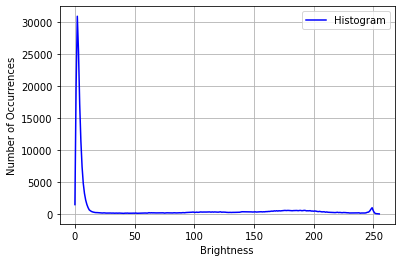

In [35]:
im = Image.open("img/moon.png")
im.show()
#returns a 2D array
moon = openImage("img/moon.png")

#plot histogram
v_hist = imhist(moon)
v_pmf = imhist(moon, PMF=True)
v_cdf = imcdf(moon)
plt.figure(num=1)
plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show()

#alternative way for plotting histogram
# hist_arr = computeHistogram(im)
# plt.hist(hist_arr, bins = 255)
# plt.show()

# # another way to find histogram of an image
# import cv2
# from matplotlib import pyplot as plt
# img = cv2.imread('img/moon.png',0)
# plt.hist(img.ravel(),256,[0,256])
# plt.show()

# plt.hist(invert_hist, bins = 255)
# plt.show()

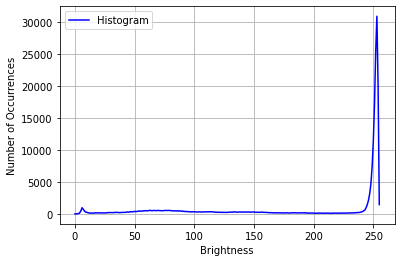

In [36]:
#invert
invert_moon = inverteImage(moon)
Image.fromarray(invert_moon).convert("L").save('invert_moon.jpg')
im = Image.open("invert_moon.jpg")
im.show()

#plot histogram
v_hist = imhist(invert_moon)
v_pmf = imhist(invert_moon, PMF=True)
v_cdf = imcdf(invert_moon)
plt.figure(num=1)
plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show()


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

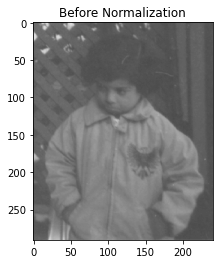

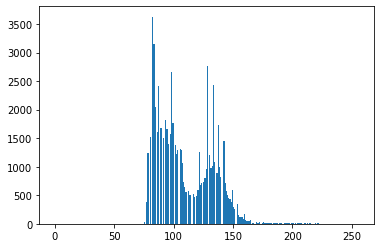

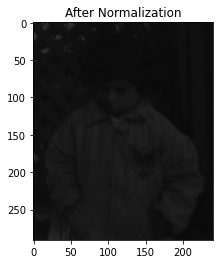

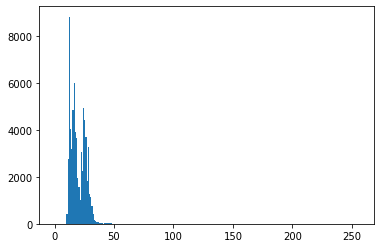

In [37]:
#returns a 2D array
pout = openImage("img/pout.png")
plt.imshow(pout, vmin=0, vmax=255)
plt.title('Before Normalization')
plt.show()
plt.hist(pout.ravel(),256,[0,256])
plt.show()

normalized = (normalizeImage(pout, 10, 50)).astype(int)
new_histo = computeHistogram(normalized)

plt.imshow(normalized, vmin=0, vmax=255)
plt.title('After Normalization')
plt.show()

plt.hist(normalized.ravel(),256,[0,256])
plt.show()

#By applying normalization we change the range of pixel values. By changing to [10, 50] interval, we
# distribute the frequencies over a narrower range than the original range (darker values), hence the the
# darker image



10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

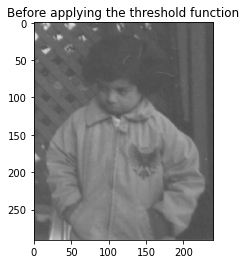

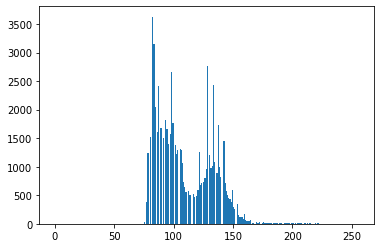

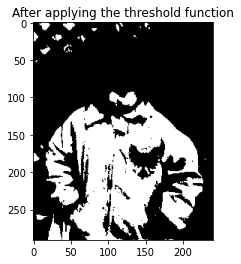

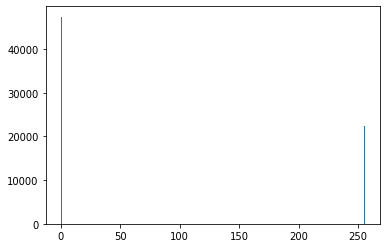

In [43]:
#returns a 2D array
pout = openImage("img/pout.png")
plt.imshow(pout, vmin=0, vmax=255)
plt.title('Before applying the threshold function')
plt.show()
plt.hist(pout.ravel(),256,[0,256])
plt.show()

thresh = (thresholdImage(pout, 127)).astype(int)
thresh_hist = computeHistogram(thresh)

plt.imshow(thresh)
plt.title('After applying the threshold function')
plt.show()

plt.hist(thresh.ravel(),256,[0,256])
plt.show()



## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 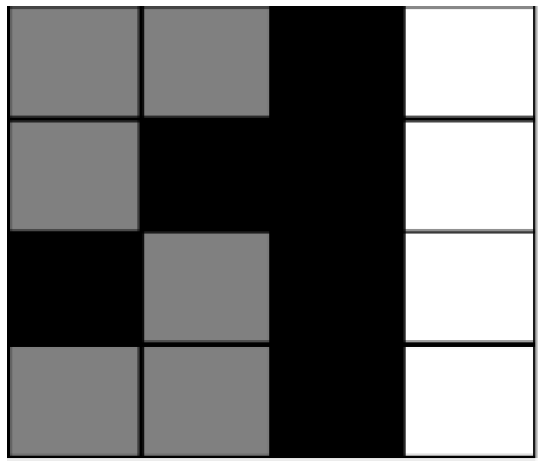 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

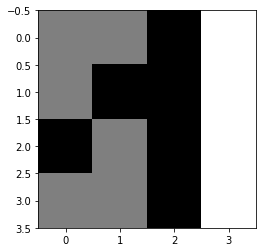

In [44]:
gen = np.array([[127, 127, 0, 255], [127, 0, 0, 255], [0, 127, 0, 255], [127, 127, 0, 255]])
im = Image.fromarray(np.uint8(gen))
plt.imshow(im)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

In [45]:
import numpy.matlib
# normal distribution 
gen = np.random.uniform(low=0, high=255, size=(512,512))
gen = gen.astype(int)
print(gen)
Image.fromarray(gen).convert("L").save('rand_gen.jpg')
im = Image.open("rand_gen.jpg")
im.show()

[[130 151 113 ...  33  82  46]
 [110   9 217 ... 248 148 101]
 [162 175 228 ...  48  34 183]
 ...
 [212  50 133 ...  15  67 198]
 [201 195 112 ...  37  64 202]
 [117  39 154 ...  17 229  97]]


In [46]:
# gaussian with mean of 128 and standard deviation of 16
gaus = np.random.normal(loc=128, scale=16, size=(512, 512))
gaus = gaus.astype(int)
print(gaus)
Image.fromarray(gaus).convert("L").save('rand_gauss_gen.jpg')
im = Image.open("rand_gauss_gen.jpg")
im.show()

# In uniform distribution all of the possible outcomes have the same equal probablities
# In the gaussian distribution the values around the mean occur more frequently and the frequency of
# occurence decreases the further we get from the mean.

[[ 98 110 124 ... 152 153 134]
 [147 117 131 ... 144 108 123]
 [152 126 141 ... 129 115 160]
 ...
 [123 157 148 ... 112 123 144]
 [128 163 119 ... 124 103 132]
 [129 111 126 ... 129 163 122]]


## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

In [47]:
im = Image.open("img/pout.png")
im.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

In [58]:
from imhist import imhist, imcdf
from scipy import signal as sp
import cv2

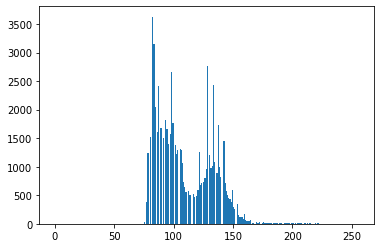

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00 3.800e+01 0.000e+00
 3.890e+02 1.245e+03 0.000e+00 1.518e+03 0.000e+00 3.628e+03 3.146e+03
 2.041e+03 0.000e+00 1.601e+03 2.415e+03 0.000e+00 1.684e+03 0.000e+00
 1.506e+03 0.000e+00 1.813e+03 1.660e+03 1.390e+03 0.000e+00 1.572e+03
 2.662

In [59]:
img = cv2.imread('img/pout.png', 0)
# alternative way to find histogram of an image
plt.hist(img.ravel(),256,[0,256])
plt.show()

histo = computeHistogram(img)
print(histo)


In [81]:
!pip install scipy==1.1.0

     ---------------------------------------- 15.6/15.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software

You should consider upgrading via the 'C:\Users\mojan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [86]:
#extrama values
# from scipy import signal as sp
# from scipy import signal
# import numpy as np
# from scipy.signal import medfilt
# import matplotlib.pyplot as plt 
# from scipy.signal import find_peaks
# import scipy.signal

# from scipy import signal
from scipy import signal
ex_loc = scipy.signal.find_peaks(histo)
print(ex_loc)

## The hiatogram is shifted towards the middle.There are not many pixels with colors that are too bright or
## or two dark. The histogram has smooth endings (ramp-like) towards both sides. This shows that the image
## is not overexposed or underexposed

AttributeError: module 'scipy.signal' has no attribute 'signal'

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

In [70]:
def histogramEqualization(I,h):
    #probability mass function
    height,width = I.shape
    pdf_img = h / h.sum()
    #cumulative distributive function 
    cdf = np.zeros([256], float)
    for i in range(0, 256):
        for j in range(0, i+1):
            cdf[i] += pdf_img[j]
    cdf_eq = np.round(cdf * 255, 0) # mapping, transformation function T(x)
    imgEqualized = np.zeros((height, width))
    for i in range(0, height):
        for j in range(0, width):
            r = I[i, j] # feeding intensity levels of pixels into r. 
            s = cdf_eq[r] # finding value of s by finding r'th position in the cdf_eq list.
            imgEqualized[i, j] = s # mapping s thus creating new output image
    return imgEqualized

            

    """ Array * (list[int] -> Array """
equalized_img = histogramEqualization(openImage("img/pout.png"), computeHistogram(openImage("img/pout.png")))
# new_p = new_p.convert("L")
Image.fromarray(equalized_img).convert("L").save('equalized.jpg')
im = Image.open("equalized.jpg")
im.show()